Product Popularity Based Recommendation System

In [11]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#loading and cleaning data
item_ratings = pd.read_csv('ratings_Beauty.csv')
item_ratings= item_ratings.dropna()  #used to remove NaN values
item_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [13]:
item_ratings.shape

(2023070, 4)

In [14]:
#grouping items based on ratings
top_products = pd.DataFrame(item_ratings.groupby('ProductId')['Rating'].count())
highest_selling = top_products.sort_values('Rating', ascending=False)
highest_selling.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

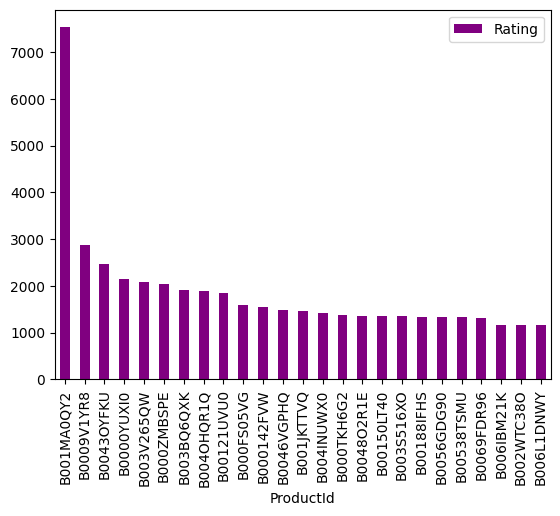

In [15]:
#data visualization & analysis
highest_selling.head(25).plot(kind="bar", color="purple")

Model-Based Collaborative Filtering System

In [16]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [20]:
# getting subset of amazon ratings
item_ratings1 = item_ratings.head(10000)
user_item_matrix = item_ratings1.pivot_table(values='Rating', 
index='UserId', columns='ProductId', fill_value=0)
user_item_matrix.head()


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
user_item_matrix.shape

(9697, 886)

In [22]:
#Transposing the matrix
X = user_item_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X.shape

(886, 9697)

Decomposing matrix using SVD

In [25]:
#Single Value Decompostion - to reduce the large number of users into lower dimension using SVD, this reduces the complexity and gives a latent pattern, modeling to identify similiar user & properties
X1 = X

#Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(X)
reduced_matrix.shape

(886, 10)

Correlation Matrix

In [34]:
corr_matrix = np.corrcoef(reduced_matrix)
corr_matrix.shape


(886, 886)

Isolating Product

In [35]:
# Randomly assuming product as such bought by a customer
X.index[46]

'1304651347'

In [36]:
i = '1304651347'
prod_list = list(X.index)
prod_ID = prod_list.index(i)
prod_ID


46

In [37]:
corr_prod_ID = corr_matrix[prod_ID]
corr_prod_ID.shape

(886,)

Recommending top 15 highly correlated products

In [39]:
rec = list(X.index[corr_prod_ID > 0.90])

# Removes the item already bought by the customer
rec.remove(i) 

rec[0:14]

['1304146537',
 '1304168522',
 '1304482596',
 '1304488608',
 '1304495396',
 '130451112X',
 '1304622428',
 '6040652705',
 '6162071103',
 '6162751473',
 '9601420347',
 '9602617918',
 '9788071139',
 '9788071260']